<a href="https://colab.research.google.com/github/ashu433/Machine-Learning-Book-Practice-Q-A/blob/main/Chapter_8_Dimensionality_Reducation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD

In [4]:
from sklearn.datasets import fetch_openml

In [5]:
MNIST=fetch_openml('mnist_784',version=1)

In [6]:
X,Y=MNIST["data"],MNIST['target']

In [6]:
X_centered = X - X.mean(axis=0)
svd = TruncatedSVD(n_components=50)
X_reduced = svd.fit_transform(X_centered)

In [7]:
U, s, Vt = np.linalg.svd(X_centered, full_matrices=False)

In [8]:
W=Vt.T[:,:2]

In [9]:
X2d=X_centered.dot(W)

In [10]:
X2d.shape

(70000, 2)

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components = 10)
X2D = pca.fit_transform(X)

In [13]:
X2D.shape

(70000, 10)

In [14]:
pca.explained_variance_ratio_

array([0.09746116, 0.07155445, 0.06149531, 0.05403385, 0.04888934,
       0.04305227, 0.03278262, 0.02889642, 0.02758364, 0.0234214 ])

In [15]:
pca=PCA()
pca.fit(X)

PCA()

In [16]:
cumulative_sum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumulative_sum>=0.95)+1

In [17]:
d

154

In [18]:
pca=PCA(n_components=0.95)
X_reduced=pca.fit_transform(X)

In [19]:
X_reduced.shape

(70000, 154)

In [20]:
X.shape

(70000, 784)

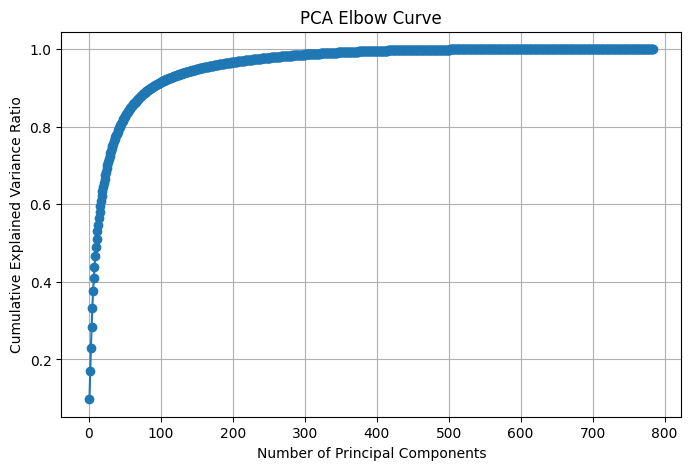

In [21]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Apply PCA without limiting components
pca = PCA()
pca.fit(X)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Elbow Curve')
plt.grid(True)
plt.show()

# **PCA compression and Recompression**

In [22]:
pca=PCA(n_components=154)
X_reduced=pca.fit_transform(X)

In [23]:
X_reduced.shape

(70000, 154)

In [24]:
X_recovered=pca.inverse_transform(X_reduced)

In [25]:
X_recovered.shape

(70000, 784)

# **Randomized PCA**

In [26]:
rnd_pca=PCA(n_components=154,svd_solver="randomized")
X_reduced=rnd_pca.fit_transform(X)

# **Incremental PCA**

In [27]:
from sklearn.decomposition import IncrementalPCA

In [28]:
n_batches=100
inc_pca=IncrementalPCA(n_components=154)

for x_batch in np.array_split(X,n_batches):
  inc_pca.partial_fit(x_batch)

x_reduced=inc_pca.transform(X)

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


# **Kernel PCA**

In [5]:
from sklearn.decomposition import KernelPCA

In [ ]:
kpca=KernelPCA(n_components=2,kernel='rbf',gamma=0.004)
X_reduced=kpca.fit_transform(X)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [ ]:
clf=Pipeline([("kpca",KernelPCA(n_components=2)),("logistic_reg",LogisticRegression())])

In [ ]:
param_grid=[{
    "kpca__gamma":np.linspace(0.03, 0.05, 10),
    "kpca__kernel":["rbf","sigmoid"]
}]

In [ ]:
grid_serch=GridSearchCV(clf,param_grid,cv=3)

In [ ]:
grid_serch.fit(X,Y)

In [ ]:
grid_search.best_params_

In [ ]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X,X_preimage)

In [1]:
from sklearn.manifold import LocallyLinearEmbedding

In [2]:
LE=LocallyLinearEmbedding(n_components=2,n_neighbors=10)

In [ ]:
x_reduced=LE.fit_transform(X)